In [1]:
import pandas as pd
import string 
import re
import time
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

# Overview data

In [3]:
df = pd.read_csv('resultData.csv')

In [4]:
df.head()

,Unnamed: 0,JobTitle,Company,Location,PostDate,ExtractDate,Summary,JobUrl
0,0,.Net Developer,SmartDev,Ðà Nẵng,Posted\nPosted 14 days ago,2023-01-25,Company Description\nSmartDev is a leading pro...,.NET Developer\n
1,1,Intern / Fresher Developer,DXC Technology,Thành phố Hồ Chí Minh,Employer\nActive 22 days ago,2023-01-25,Overview:\nHow would you like to join an inter...,.NET Developer\n
2,2,.NET Developer (Middle/Senior level),SIOUX,Ðà Nẵng,Posted\nPosted 30+ days ago,2023-01-25,Sioux Group was founded in 1996 in the Netherl...,.NET Developer\n
3,3,Jun/Mid/Senior .NET Developer,Saigon Technology,Ðà Nẵng,Posted\nPosted 18 days ago,2023-01-25,"Up to $2,200\nJunior, Middle, Senior\nDa Nang\...",.NET Developer\n
4,4,"Web Developer (.NET, ASP.NET, C#)",NPV Corp,Ðà Nẵng,Posted\nPosted 16 days ago,2023-01-25,"Web Developer (.NET, ASP.NET, C#)\nNPV Corp\nỨ...",.NET Developer\n


In [5]:
df.loc[df['Unnamed: 0'] == 0, :]

,Unnamed: 0,JobTitle,Company,Location,PostDate,ExtractDate,Summary,JobUrl
0,0,.Net Developer,SmartDev,Ðà Nẵng,Posted\nPosted 14 days ago,2023-01-25,Company Description\nSmartDev is a leading pro...,.NET Developer\n
644,0,Senior Mobile Android Developer,KMS Healthcare,Thành phố Hồ Chí Minh,Posted\nJust posted,2023-01-25,Company Description\n\nKMS Healthcare is the i...,Android App Developer\n
796,0,Android Developer (GST),FPT Software Danang,Ðà Nẵng,Posted\nPosted 26 days ago,2023-01-25,Job Description\nDaily cooperate with Product ...,Android Developer\n
1172,0,Frontend Developer (fresher),Recruitery,Thành phố Hồ Chí Minh,Employer\nActive 2 days ago,2023-01-25,RESPONSIBILITIES\nDelivering a complete front ...,Back End Developer\n
1539,0,Full Stack Web Developer,Sportfolio Incorporated,Thành phố Hồ Chí Minh,Posted\nPosted 2 days ago,2023-01-25,Job description\nDesign front-end GUI of tradi...,Back End Web Developer\n
1767,0,Brse - Bridge Engineer,Công ty cổ phần phần mềm TPS,Thành phố Hồ Chí Minh,Posted\nPosted 29 days ago,2023-01-25,Mô tả công việc:\n(Mức lương: Thỏa thuận)\nAna...,Bridge Engineer\n
1834,0,Business Analyst Collaborator,Zalo,Thành phố Hồ Chí Minh,Posted\nPosted 30+ days ago,2023-01-25,What you will do\nExecute data processing & cl...,Business Analyst\n
2575,0,Senior C++ Telematics Developer,Luxoft,Remote,Posted\nPosted 6 days ago,2023-01-26,Project Description\nLuxoft is an industry-lea...,C++ Developer\n
2782,0,HCMC - Embedded Software Engineer (Open levels),Amaris Consulting,Thành phố Hồ Chí Minh,Posted\nPosted 6 days ago,2023-01-26,Who are we?\nAmaris Consulting is an independe...,Embedded Engineer\n
2936,0,Frontend Developer (fresher),Recruitery,Thành phố Hồ Chí Minh,Employer\nActive 2 days ago,2023-01-26,RESPONSIBILITIES\nDelivering a complete front ...,Front End Developer\n


# Overview data

In [6]:
df.columns

Index(['Unnamed: 0', 'JobTitle', 'Company', 'Location', 'PostDate',
       'ExtractDate', 'Summary', 'JobUrl'],
      dtype='object')

In [7]:
# show infomaion data
def overView(x):
    listSummary = []
    for i in x.columns:
        row = x[i].shape[0]
        missingVal = x[i].isna().sum()
        unique = len(x[i].unique())
        typeCol = str(x[i].dtype)
        percentageMissingVal = x[i].isna().sum()/x.shape[0]*100
        listSummary.append([i, row,typeCol,unique, missingVal, percentageMissingVal])
    return pd.DataFrame(listSummary, columns = ['Name Columns', 'Total row', 'type col', 'Total unique', 'Total miss val', 'percentage missing value'])


In [8]:
def checkData(rows, columns):
    """get row data any"""
    return df.iloc[rows, columns]

In [9]:
overView(df)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,Unnamed: 0,4379,int64,741,0,0.0
1,JobTitle,4379,object,2220,0,0.0
2,Company,4379,object,1114,0,0.0
3,Location,4379,object,39,0,0.0
4,PostDate,4379,object,43,0,0.0
5,ExtractDate,4379,object,2,0,0.0
6,Summary,4379,object,2678,0,0.0
7,JobUrl,4379,object,13,0,0.0


In [10]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [11]:
df = df.reset_index()

In [12]:
df

,index,JobTitle,Company,Location,PostDate,ExtractDate,Summary,JobUrl
0,0,.Net Developer,SmartDev,Ðà Nẵng,Posted\nPosted 14 days ago,2023-01-25,Company Description\nSmartDev is a leading pro...,.NET Developer\n
1,1,Intern / Fresher Developer,DXC Technology,Thành phố Hồ Chí Minh,Employer\nActive 22 days ago,2023-01-25,Overview:\nHow would you like to join an inter...,.NET Developer\n
2,2,.NET Developer (Middle/Senior level),SIOUX,Ðà Nẵng,Posted\nPosted 30+ days ago,2023-01-25,Sioux Group was founded in 1996 in the Netherl...,.NET Developer\n
3,3,Jun/Mid/Senior .NET Developer,Saigon Technology,Ðà Nẵng,Posted\nPosted 18 days ago,2023-01-25,"Up to $2,200\nJunior, Middle, Senior\nDa Nang\...",.NET Developer\n
4,4,"Web Developer (.NET, ASP.NET, C#)",NPV Corp,Ðà Nẵng,Posted\nPosted 16 days ago,2023-01-25,"Web Developer (.NET, ASP.NET, C#)\nNPV Corp\nỨ...",.NET Developer\n
...,...,...,...,...,...,...,...,...
4374,4374,[HCM] Lập Trình Viên Fullstack Senior/Junior (...,JobsGO Recruit,Thành phố Hồ Chí Minh,Posted\nPosted 24 days ago,2023-01-26,Mô tả công việc:\n(Mức lương: 15 - 45 triệu VN...,Full Stack Web Developer\n
4375,4375,[Cầu Giấy/HN] React Native Developerusd,Việc Ơi Client,Hà Nội,Posted\nPosted 30+ days ago,2023-01-26,Giới thiệu:\n...\nJob description:\nWe are str...,Full Stack Web Developer\n
4376,4376,[HÀ NỘI] SENIOR/ MIDDLE RUBY ON RAILS,Việc Ơi It Client,Hà Nội,Posted\nPosted 30+ days ago,2023-01-26,Giới thiệu:\nViệc Ơi It Client\n\nlà công ty 1...,Full Stack Web Developer\n
4377,4377,"Lập Trình Viên Fullstack (PHP, MYSQL, React) S...",JobsGO Recruit,Thành phố Hồ Chí Minh,Posted\nPosted 26 days ago,2023-01-26,Mô tả công việc:\n(Mức lương: Thỏa thuận)\nDev...,Full Stack Web Developer\n


In [13]:
len(df.loc[df.duplicated() == False, :])

4379

In [14]:
df.columns

Index(['index', 'JobTitle', 'Company', 'Location', 'PostDate', 'ExtractDate',
       'Summary', 'JobUrl'],
      dtype='object')

In [15]:
x = df['Summary'][1]
print(x)

Overview:
How would you like to join an international software development center in Vietnam to learn, to grow personally as well as professionally, and to gain valuable experience in a fast-paced development environment?
An exciting and challenging opportunity has been available for those who are passionate about learning and building applications using Java/.NET/JavaScript/DevOps/ ServiceNow /AI/ Cobol technologies, as well as in Testing and Bridge Software Engineering.
Your primary responsibilities will include develop, and maintenance and perform assurance of software products. The successful candidate will be part of a high-performing development team in a high frequency/low latency environment.
Requirements:
Fresh graduates or final-year students in Computer Science, Information Technology, Software Engineering or related technical field. Third-year students can also be considered.
Good knowledge in Object-oriented programming concept.
Basic English communication skills.
At least

# Fix summary text

In [16]:
df['Summary'] = df.Summary.apply(lambda x: word_tokenize(x))
df['Summary'] = df.Summary.apply(lambda x: [w for w in x if w not in stop_words])
df['Summary'] = df.Summary.apply(lambda x: ' '.join(x))

df['Summary'] = df.Summary.apply(lambda x: word_tokenize(x))
df['Summary'] = df.Summary.apply(lambda x: [stemmer.stem(word) for word in x])
df['Summary'] = df.Summary.apply(lambda x: ' '.join(x))


KeyboardInterrupt: 

In [ ]:
df['Summary'] = df['Summary'].str.lower()
df['Summary'] = df['Summary'].str.replace('\n', ' ')
df['Summary'] = df['Summary'].apply(lambda x : re.sub(r'(<[^>]+>)|(http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)',' ',x))
df['Summary'] = df['Summary'].apply(lambda x : re.sub('\W',' ',x))


In [ ]:
def stringReplace(string):
    """replace space string """
    index = string.find('  ')
    while index >= 0:
        string = string.replace('  ', ' ')
        index = string.find('  ')
    string = string.strip()
    return string

In [ ]:
df['Summary'] = df['Summary'].apply(lambda string: stringReplace(string))

In [ ]:
df['Summary'][1]

In [ ]:
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# text = "qualifications proven 3 years work experience net developer"
# words = text.split(",")
# stemmed_words = [stemmer.stem(word) for word in words]
# text = ",".join(stemmed_words)
# print(text)

In [22]:
# df['Summary'][100]

# years experience

In [23]:
df['Summary'] = df['Summary'].str.replace('năm', 'year')

df['YearExperience'] = df['Summary'].apply(lambda x : re.findall(r'([0-9]+) year',x))
df['YearExperience'] = df['YearExperience'].apply(lambda y : [0] if len(y)==0 else y)
# df['YearExperience'] = df['YearExperience'].apply(lambda z : min(z))
# df['YearExperience'] = df.YearExperience.astype(int)

In [24]:
def convertInt(array):
    result = []
    for arr in array:
        result.append(int(arr))
    return min(result)

In [25]:
convertInt(['5', '1000', '5'])

5

In [26]:
df['YearExperience'] = df['YearExperience'].apply(lambda arr: convertInt(arr)) 

In [27]:
df['YearExperience'].unique()

array([   3,    0,    4,    2,    1,    7,    5,    8,   15,    6,  200,
          9,  160,   10,   30,  100,   12,   40,   11,  150,   80,   25,
         20,   28,   22, 1500], dtype=int64)

In [28]:
df['YearExperience'].describe()

count    4379.000000
mean        3.907513
std        45.987732
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max      1500.000000
Name: YearExperience, dtype: float64

In [29]:
df['YearExperience'].value_counts()

0       967
2       926
1       918
3       792
5       404
4       207
7        39
8        38
6        25
10       22
15        9
9         4
160       4
12        4
1500      4
200       3
30        2
150       2
25        2
100       1
40        1
11        1
80        1
20        1
28        1
22        1
Name: YearExperience, dtype: int64

In [30]:
df = df.loc[df['YearExperience'] <=10, :]

In [31]:
df.shape

(4342, 9)

# Skill

In [32]:
df['Summary'][1]

'overview how would like join intern softwar develop center vietnam learn grow person well profession gain valuabl experi fast pac develop environ an excit challeng opportun avail passion learn build applic use java net javascript devops servicenow ai cobol technolog well test bridg softwar engin your primari respons includ develop mainten perform assur softwar product the success candid part high perform develop team high frequency low latenc environ requir fresh graduat final year student comput scienc inform technolog softwar engin relat technic field third year student also consid good knowledg object ori program concept basic english commun skill at least japanes n4 want bridg softwar engin opportun work onshor dxc japan ha knowledg relev work experi follow program languag technolog java java ee net c c c javascript sql system linux window server abil learn short time work pressur experi work intern softwar develop project advantag good analyt commun skill be abl work independ wor

In [33]:
Programming_Languages = ['python', 'java','c', ' r ', 'php', 'javascript', 'ruby', 'perl', 'sql','go', 'html', 'css', 'react',
                        'mongodb', 'json', 'angular', 'kotlin', 'django', 'typescript', 'linux', 
                        'mysql', 'nodejs', 'git', 'asp', 'cloud']

Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    st = ' '+ i + ' '
    x = df['Summary'].str.contains(st).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

{'python': 495, 'java': 1000, 'c': 1338, ' r ': 0, 'php': 601, 'javascript': 1776, 'ruby': 9, 'perl': 39, 'sql': 1085, 'go': 345, 'html': 1024, 'css': 1122, 'react': 998, 'mongodb': 365, 'json': 264, 'angular': 639, 'kotlin': 185, 'django': 71, 'typescript': 499, 'linux': 385, 'mysql': 742, 'nodejs': 69, 'git': 1016, 'asp': 391, 'cloud': 692}


In [34]:
def skill(string):
    Programming_Languages = ['python', 'java ','c', 'r', 'php', 'javascript', 'ruby', 'perl', 'sql',' go ', 'html', 'css', 'react',
                        'mongodb', 'json', 'angular', 'kotlin', 'django', 'typescript', 'linux', 
                        'mysql', 'nodej', 'git', 'asp', 'cloud']
    Languages = dict((x,0) for x in Programming_Languages)
    result = ''
    for i in Languages:
        st = ' '+ i + ' '
        if (string.__contains__(st)):
            
            result += i
            result += ', '
    return result

In [35]:
df['skill'] = df['Summary'].apply(lambda string: skill(string))

C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\3534847934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['skill'] = df['Summary'].apply(lambda string: skill(string))


In [36]:
df['skill']

0         c, javascript, sql, typescript, nodej, asp, 
1                          c, javascript, sql, linux, 
2                                          c, r, sql, 
3                                   sql, html, react, 
4                                        c, sql, asp, 
                             ...                      
4374    php, javascript, sql, typescript, mysql, git, 
4375              javascript, react, typescript, git, 
4376               php, javascript, html, css, mysql, 
4377    php, javascript, sql, typescript, mysql, git, 
4378                           react, angular, cloud, 
Name: skill, Length: 4342, dtype: object

# Type work

In [37]:
df['Summary'][55]

'intermedi develop java net takeit ứng tuyển java reactj net đăng nhập để xem mức lương 204c nguyen van huong street thao dien ward district 2 thu duc citi ho chi minh xem bản đồ tại văn phòng 4 giờ trước mô tả công việc what re look primari respons focus new develop mainten work relat exist futur applic well support lower level colleagu thi involv everyth detail design code unit test functions appl instruct respons analyz system requir studi system architectur develop technic specif detail design write clean testabl maintain code test debug variou java net applic review refactor code upgrad maintain exist program support fresher junior develop work yêu cầu công việc 2 year experi java net applic develop good logic think self learn skill understand abl appli oop solid dri concept experienc relat databas sql experienc java net experienc frontend framework vuej reactj angular experienc investig problem solv be abl commun english verbal non verb toeic 600 have japanes certif plu tại sao b

In [38]:
Programming_Languages = ['intern', 'junior', 'senior', 'middle', 'fresher']

Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    st = ' '+ i + ' '
    x = df['Summary'].str.contains(st).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

{'intern': 1251, 'junior': 435, 'senior': 1315, 'middle': 14, 'fresher': 119}


In [39]:
def leveldev(string):
    level = ['intern', 'junior', 'senior', 'middle', 'fresher', 'full stack']
    levels = dict((x,0) for x in level)
    result = ''
    for i in levels:
        st = ' '+ i + ' '
        if (string.__contains__(st)):
            
            result += i
            result += ', '
    return result

In [40]:

df['level'] = df['Summary'].apply(lambda string: leveldev(string))

C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\1031062542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level'] = df['Summary'].apply(lambda string: leveldev(string))


In [41]:
df.loc[df['level'] == '', ['Summary', 'level', 'YearExperience']]['YearExperience'].value_counts()

0     465
1     406
2     389
3     237
5     114
4      47
8      10
10      7
7       6
Name: YearExperience, dtype: int64

In [42]:
indxs = df.loc[df['level'] == '', :].index
for indx in indxs:
    if df['YearExperience'][indx] == 0:
        df['level'][indx] = 'fresher'
    elif df['YearExperience'][indx] <= 3:
        df['level'][indx] = 'junior'
    else:
        df['level'][indx] = 'senior'

C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\575760265.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level'][indx] = 'junior'
C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\575760265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level'][indx] = 'fresher'
C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\575760265.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level'][indx] = 'senio

In [43]:
df.loc[df['level'] == '', :]

,index,JobTitle,Company,Location,PostDate,ExtractDate,Summary,JobUrl,YearExperience,skill,level


In [44]:
df['level'].value_counts()

junior                                  1032
intern,                                  629
senior,                                  595
fresher                                  465
full stack,                              336
intern, senior,                          263
senior                                   184
intern, full stack,                      131
junior, senior,                          129
senior, full stack,                       90
junior,                                   71
intern, senior, full stack,               71
junior, senior, full stack,               69
intern, junior, senior,                   68
fresher,                                  61
intern, junior,                           36
junior, full stack,                       26
intern, fresher,                          19
intern, junior, full stack,               13
senior, fresher,                          10
fresher, full stack,                       8
junior, fresher,                           7
intern, ju

In [45]:
overView(df)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,index,4342,int64,4342,0,0.0
1,JobTitle,4342,object,2193,0,0.0
2,Company,4342,object,1104,0,0.0
3,Location,4342,object,38,0,0.0
4,PostDate,4342,object,43,0,0.0
5,ExtractDate,4342,object,2,0,0.0
6,Summary,4342,object,2642,0,0.0
7,JobUrl,4342,object,13,0,0.0
8,YearExperience,4342,int64,11,0,0.0
9,skill,4342,object,840,0,0.0


# TF-IDF

In [46]:
# https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089

In [47]:
df['JobTitle'].unique()

array(['.Net Developer', 'Intern / Fresher Developer',
       '.NET Developer (Middle/Senior level)', ...,
       'Senior Fullstack Engineer (Java, React)',
       '[HCM] Lập Trình Viên Fullstack Senior/Junior (PHP, MYSQL, React) - Lương Từ 15 - 45 Triệu - Đh1026694',
       'Senior Backend Engineer (Java/GoLang)'], dtype=object)

In [48]:
df['Company'].unique()

array(['SmartDev', 'DXC Technology', 'SIOUX', ..., 'YouNet',
       'Kyber Network', 'HASAKI BEAUTY & SPA'], dtype=object)

In [49]:
df['Location'].unique()

array(['Ðà Nẵng', 'Thành phố Hồ Chí Minh', 'Việt Nam', 'Hà Nội',
       'Thành phố Hồ Chí Minh\n+1 location', 'Hà Nội\n+1 location',
       'Thủ Dầu Một', 'Remote', 'Bình Dương', 'Bắc Ninh', 'Đồng Nai',
       'Nha Trang', 'Quận 7', 'Hòa Bình', 'Gò Vấp', 'Đắk Lắk', 'Long An',
       'Thừa Thiên - Huế', 'Long Thành', 'Nghệ An',
       'Thành phố Hồ Chí Minh\n+2 locations', 'Cần Thơ', 'An Giang',
       'Thủ Đức', 'Việt Nam\n+1 location', 'Huế', 'Hạ Long',
       'Bình Dương\n+1 location', 'Hưng Yên', 'Bình Định', 'Đà Lạt',
       'Quảng Ngãi', 'Ðà Nẵng\n+1 location', 'Hải Phòng', 'Thuận An',
       'Ðà Nẵng\n+2 locations', 'Thanh Hóa', 'Khánh Hòa'], dtype=object)

In [50]:
def locationString(string):
    if string.find('\n') >= 0:
        index1 = string.index('\n')
        index2 = len(string)
        return string.replace(string[index1: index2], '')
    else:
        return string

In [51]:
df['Location'] = df['Location'].apply(lambda string: locationString(string))

C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\2817351769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Location'].apply(lambda string: locationString(string))


In [52]:
overView(df)

,Name Columns,Total row,type col,Total unique,Total miss val,percentage missing value
0,index,4342,int64,4342,0,0.0
1,JobTitle,4342,object,2193,0,0.0
2,Company,4342,object,1104,0,0.0
3,Location,4342,object,31,0,0.0
4,PostDate,4342,object,43,0,0.0
5,ExtractDate,4342,object,2,0,0.0
6,Summary,4342,object,2642,0,0.0
7,JobUrl,4342,object,13,0,0.0
8,YearExperience,4342,int64,11,0,0.0
9,skill,4342,object,840,0,0.0


In [53]:
df[['JobTitle', 'Company', 'Location', 'YearExperience', 'skill', 'level', 'JobUrl']]

,JobTitle,Company,Location,YearExperience,skill,level,JobUrl
0,.Net Developer,SmartDev,Ðà Nẵng,3,"c, javascript, sql, typescript, nodej, asp,","intern,",.NET Developer\n
1,Intern / Fresher Developer,DXC Technology,Thành phố Hồ Chí Minh,0,"c, javascript, sql, linux,","intern,",.NET Developer\n
2,.NET Developer (Middle/Senior level),SIOUX,Ðà Nẵng,4,"c, r, sql,","intern,",.NET Developer\n
3,Jun/Mid/Senior .NET Developer,Saigon Technology,Ðà Nẵng,2,"sql, html, react,","junior, senior,",.NET Developer\n
4,"Web Developer (.NET, ASP.NET, C#)",NPV Corp,Ðà Nẵng,1,"c, sql, asp,",junior,.NET Developer\n
...,...,...,...,...,...,...,...
4374,[HCM] Lập Trình Viên Fullstack Senior/Junior (...,JobsGO Recruit,Thành phố Hồ Chí Minh,1,"php, javascript, sql, typescript, mysql, git,","junior, senior, full stack,",Full Stack Web Developer\n
4375,[Cầu Giấy/HN] React Native Developerusd,Việc Ơi Client,Hà Nội,2,"javascript, react, typescript, git,","junior, full stack,",Full Stack Web Developer\n
4376,[HÀ NỘI] SENIOR/ MIDDLE RUBY ON RAILS,Việc Ơi It Client,Hà Nội,2,"php, javascript, html, css, mysql,","senior, full stack,",Full Stack Web Developer\n
4377,"Lập Trình Viên Fullstack (PHP, MYSQL, React) S...",JobsGO Recruit,Thành phố Hồ Chí Minh,1,"php, javascript, sql, typescript, mysql, git,","junior, senior, full stack,",Full Stack Web Developer\n


In [54]:
df['JobTitle'][4376]

'[HÀ NỘI] SENIOR/ MIDDLE RUBY ON RAILS'

In [55]:
def titleString(string):
    if string.find('(') >= 0:
        index1 = string.index('(')
        index2 = len(string)
        return string.replace(string[index1: index2], '')
    else:
        return string
    
def titleString1(string):
    if string.find('[') >= 0:
        index1 = string.index('[')
        index2 = string.index(']')
        return string.replace(string[index1: index2+1], '')
    else:
        return string

In [56]:
df['JobTitle'] = df['JobTitle'].apply(lambda string: titleString(string))
df['JobTitle'] = df['JobTitle'].apply(lambda string: titleString1(string))

C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\481414845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JobTitle'] = df['JobTitle'].apply(lambda string: titleString(string))
C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\481414845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JobTitle'] = df['JobTitle'].apply(lambda string: titleString1(string))


In [57]:
df['JobTitle'] = df['JobTitle'].str.lower()
df['JobTitle'] = df['JobTitle'].apply(lambda x : re.sub('\W',' ',x))

C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\74149187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JobTitle'] = df['JobTitle'].str.lower()
C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\74149187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JobTitle'] = df['JobTitle'].apply(lambda x : re.sub('\W',' ',x))


In [58]:
df['JobTitle'] = df['JobTitle'].apply(lambda x : re.sub('intern|fresher|middle|junior|mid|jun|senior',' ',x))

C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\1530448714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JobTitle'] = df['JobTitle'].apply(lambda x : re.sub('intern|fresher|middle|junior|mid|jun|senior',' ',x))


In [59]:
df['JobTitle'] = df['JobTitle'].apply(lambda string: stringReplace(string))

C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\830991017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JobTitle'] = df['JobTitle'].apply(lambda string: stringReplace(string))


In [60]:
len(df['JobTitle'].unique())

1307

In [61]:
df['JobTitle']

0                   net developer
1                       developer
2                   net developer
3                   net developer
4                   web developer
                  ...            
4374     lập trình viên fullstack
4375    react native developerusd
4376                ruby on rails
4377     lập trình viên fullstack
4378           fullstack engineer
Name: JobTitle, Length: 4342, dtype: object

In [62]:
df.head()

,index,JobTitle,Company,Location,PostDate,ExtractDate,Summary,JobUrl,YearExperience,skill,level
0,0,net developer,SmartDev,Ðà Nẵng,Posted\nPosted 14 days ago,2023-01-25,compani descript smartdev lead provid global s...,.NET Developer\n,3,"c, javascript, sql, typescript, nodej, asp,","intern,"
1,1,developer,DXC Technology,Thành phố Hồ Chí Minh,Employer\nActive 22 days ago,2023-01-25,overview how would like join intern softwar de...,.NET Developer\n,0,"c, javascript, sql, linux,","intern,"
2,2,net developer,SIOUX,Ðà Nẵng,Posted\nPosted 30+ days ago,2023-01-25,sioux group found 1996 netherland with 800 eng...,.NET Developer\n,4,"c, r, sql,","intern,"
3,3,net developer,Saigon Technology,Ðà Nẵng,Posted\nPosted 18 days ago,2023-01-25,up 2 200 junior middl senior da nang full tim ...,.NET Developer\n,2,"sql, html, react,","junior, senior,"
4,4,web developer,NPV Corp,Ðà Nẵng,Posted\nPosted 16 days ago,2023-01-25,web develop net asp net c npv corp ứng tuyển n...,.NET Developer\n,1,"c, sql, asp,",junior


In [63]:
df['Location'].unique()

array(['Ðà Nẵng', 'Thành phố Hồ Chí Minh', 'Việt Nam', 'Hà Nội',
       'Thủ Dầu Một', 'Remote', 'Bình Dương', 'Bắc Ninh', 'Đồng Nai',
       'Nha Trang', 'Quận 7', 'Hòa Bình', 'Gò Vấp', 'Đắk Lắk', 'Long An',
       'Thừa Thiên - Huế', 'Long Thành', 'Nghệ An', 'Cần Thơ', 'An Giang',
       'Thủ Đức', 'Huế', 'Hạ Long', 'Hưng Yên', 'Bình Định', 'Đà Lạt',
       'Quảng Ngãi', 'Hải Phòng', 'Thuận An', 'Thanh Hóa', 'Khánh Hòa'],
      dtype=object)

In [64]:
df['Location'] = df['Location'].str.lower()
df['Location'] = df['Location'].str.replace('ð', 'đ')

C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\2044757482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Location'].str.lower()
C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\2044757482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Location'].str.replace('ð', 'đ')


In [65]:
df['Company'].unique()

array(['SmartDev', 'DXC Technology', 'SIOUX', ..., 'YouNet',
       'Kyber Network', 'HASAKI BEAUTY & SPA'], dtype=object)

In [66]:
df['Company'] = df['Company'].str.lower()

C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\3875001097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Company'] = df['Company'].str.lower()


In [67]:
df['JobUrl'] = df['JobUrl'].str.replace('\n', '')

C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\578620109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JobUrl'] = df['JobUrl'].str.replace('\n', '')


In [68]:
df['skill'] = df['skill'].apply(lambda string: re.sub(', $', '', string))
df['level'] = df['level'].apply(lambda string: re.sub(', $', '', string))

C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\1976726363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['skill'] = df['skill'].apply(lambda string: re.sub(', $', '', string))
C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\1976726363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level'] = df['level'].apply(lambda string: re.sub(', $', '', string))


In [69]:
df[['JobTitle', 'Company', 'Location', 'YearExperience', 'skill', 'level', 'JobUrl']]

,JobTitle,Company,Location,YearExperience,skill,level,JobUrl
0,net developer,smartdev,đà nẵng,3,"c, javascript, sql, typescript, nodej, asp",intern,.NET Developer
1,developer,dxc technology,thành phố hồ chí minh,0,"c, javascript, sql, linux",intern,.NET Developer
2,net developer,sioux,đà nẵng,4,"c, r, sql",intern,.NET Developer
3,net developer,saigon technology,đà nẵng,2,"sql, html, react","junior, senior",.NET Developer
4,web developer,npv corp,đà nẵng,1,"c, sql, asp",junior,.NET Developer
...,...,...,...,...,...,...,...
4374,lập trình viên fullstack,jobsgo recruit,thành phố hồ chí minh,1,"php, javascript, sql, typescript, mysql, git","junior, senior, full stack",Full Stack Web Developer
4375,react native developerusd,việc ơi client,hà nội,2,"javascript, react, typescript, git","junior, full stack",Full Stack Web Developer
4376,ruby on rails,việc ơi it client,hà nội,2,"php, javascript, html, css, mysql","senior, full stack",Full Stack Web Developer
4377,lập trình viên fullstack,jobsgo recruit,thành phố hồ chí minh,1,"php, javascript, sql, typescript, mysql, git","junior, senior, full stack",Full Stack Web Developer


In [70]:
df['skill'][4377]

'php, javascript, sql, typescript, mysql, git'

In [71]:
df['Location'].unique()

array(['đà nẵng', 'thành phố hồ chí minh', 'việt nam', 'hà nội',
       'thủ dầu một', 'remote', 'bình dương', 'bắc ninh', 'đồng nai',
       'nha trang', 'quận 7', 'hòa bình', 'gò vấp', 'đắk lắk', 'long an',
       'thừa thiên - huế', 'long thành', 'nghệ an', 'cần thơ', 'an giang',
       'thủ đức', 'huế', 'hạ long', 'hưng yên', 'bình định', 'đà lạt',
       'quảng ngãi', 'hải phòng', 'thuận an', 'thanh hóa', 'khánh hòa'],
      dtype=object)

In [72]:
df.drop(columns= 'Summary', inplace= True)

C:\Users\Tran Huu An\AppData\Local\Temp\ipykernel_13004\1101605052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns= 'Summary', inplace= True)


In [499]:
data = df.iloc[:5, :]

In [500]:
data

,index,JobTitle,Company,Location,PostDate,ExtractDate,JobUrl,YearExperience,skill,level
0,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern
1,1,developer,dxc technology,thành phố hồ chí minh,Employer\nActive 22 days ago,2023-01-25,.NET Developer,0,"c, javascript, sql, linux",intern
2,2,net developer,sioux,đà nẵng,Posted\nPosted 30+ days ago,2023-01-25,.NET Developer,4,"c, r, sql",intern
3,3,net developer,saigon technology,đà nẵng,Posted\nPosted 18 days ago,2023-01-25,.NET Developer,2,"sql, html, react","junior, senior"
4,4,web developer,npv corp,đà nẵng,Posted\nPosted 16 days ago,2023-01-25,.NET Developer,1,"c, sql, asp",junior


In [73]:

skill = pd.DataFrame(df.set_index('index').skill.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)).reset_index()

# đổi tên cột 0 trong dataFrame skill thành 'skill_cut'
skill.rename(columns = {0:'skill_cut'}, inplace = True)
# gộp dataFrame df và skill vói nhay theo "Unnameed: 0"
df = df.merge(skill, left_on = 'index', right_on = 'index')

In [74]:
df.head()

,index,JobTitle,Company,Location,PostDate,ExtractDate,JobUrl,YearExperience,skill,level,skill_cut
0,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern,c
1,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern,javascript
2,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern,sql
3,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern,typescript
4,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern,nodej


In [75]:
df.shape

(15072, 11)

In [76]:
df.loc[df.duplicated() == False, :]

,index,JobTitle,Company,Location,PostDate,ExtractDate,JobUrl,YearExperience,skill,level,skill_cut
0,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern,c
1,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern,javascript
2,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern,sql
3,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern,typescript
4,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern,nodej
...,...,...,...,...,...,...,...,...,...,...,...
15067,4377,lập trình viên fullstack,jobsgo recruit,thành phố hồ chí minh,Posted\nPosted 26 days ago,2023-01-26,Full Stack Web Developer,1,"php, javascript, sql, typescript, mysql, git","junior, senior, full stack",mysql
15068,4377,lập trình viên fullstack,jobsgo recruit,thành phố hồ chí minh,Posted\nPosted 26 days ago,2023-01-26,Full Stack Web Developer,1,"php, javascript, sql, typescript, mysql, git","junior, senior, full stack",git
15069,4378,fullstack engineer,zühlke,thành phố hồ chí minh,Posted\nPosted 30+ days ago,2023-01-26,Full Stack Web Developer,5,"react, angular, cloud",senior,react
15070,4378,fullstack engineer,zühlke,thành phố hồ chí minh,Posted\nPosted 30+ days ago,2023-01-26,Full Stack Web Developer,5,"react, angular, cloud",senior,angular


In [77]:
dfx = df.loc[df['index'].duplicated() == False, :]

In [78]:
dfx

,index,JobTitle,Company,Location,PostDate,ExtractDate,JobUrl,YearExperience,skill,level,skill_cut
0,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern,c
6,1,developer,dxc technology,thành phố hồ chí minh,Employer\nActive 22 days ago,2023-01-25,.NET Developer,0,"c, javascript, sql, linux",intern,c
10,2,net developer,sioux,đà nẵng,Posted\nPosted 30+ days ago,2023-01-25,.NET Developer,4,"c, r, sql",intern,c
13,3,net developer,saigon technology,đà nẵng,Posted\nPosted 18 days ago,2023-01-25,.NET Developer,2,"sql, html, react","junior, senior",sql
16,4,web developer,npv corp,đà nẵng,Posted\nPosted 16 days ago,2023-01-25,.NET Developer,1,"c, sql, asp",junior,c
...,...,...,...,...,...,...,...,...,...,...,...
15048,4374,lập trình viên fullstack,jobsgo recruit,thành phố hồ chí minh,Posted\nPosted 24 days ago,2023-01-26,Full Stack Web Developer,1,"php, javascript, sql, typescript, mysql, git","junior, senior, full stack",php
15054,4375,react native developerusd,việc ơi client,hà nội,Posted\nPosted 30+ days ago,2023-01-26,Full Stack Web Developer,2,"javascript, react, typescript, git","junior, full stack",javascript
15058,4376,ruby on rails,việc ơi it client,hà nội,Posted\nPosted 30+ days ago,2023-01-26,Full Stack Web Developer,2,"php, javascript, html, css, mysql","senior, full stack",php
15063,4377,lập trình viên fullstack,jobsgo recruit,thành phố hồ chí minh,Posted\nPosted 26 days ago,2023-01-26,Full Stack Web Developer,1,"php, javascript, sql, typescript, mysql, git","junior, senior, full stack",php


In [79]:

skill = pd.DataFrame(dfx.set_index('index').level.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)).reset_index()

# đổi tên cột 0 trong dataFrame skill thành 'skill_cut'
skill.rename(columns = {0:'level_cut'}, inplace = True)
# gộp dataFrame df và skill vói nhay theo "Unnameed: 0"
df = df.merge(skill, left_on = 'index', right_on = 'index', how='right')

In [80]:
df.loc[df.duplicated() == False, :]

,index,JobTitle,Company,Location,PostDate,ExtractDate,JobUrl,YearExperience,skill,level,skill_cut,level_cut
0,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern,c,intern
1,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern,javascript,intern
2,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern,sql,intern
3,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern,typescript,intern
4,0,net developer,smartdev,đà nẵng,Posted\nPosted 14 days ago,2023-01-25,.NET Developer,3,"c, javascript, sql, typescript, nodej, asp",intern,nodej,intern
...,...,...,...,...,...,...,...,...,...,...,...,...
20069,4377,lập trình viên fullstack,jobsgo recruit,thành phố hồ chí minh,Posted\nPosted 26 days ago,2023-01-26,Full Stack Web Developer,1,"php, javascript, sql, typescript, mysql, git","junior, senior, full stack",mysql,full stack
20070,4377,lập trình viên fullstack,jobsgo recruit,thành phố hồ chí minh,Posted\nPosted 26 days ago,2023-01-26,Full Stack Web Developer,1,"php, javascript, sql, typescript, mysql, git","junior, senior, full stack",git,full stack
20071,4378,fullstack engineer,zühlke,thành phố hồ chí minh,Posted\nPosted 30+ days ago,2023-01-26,Full Stack Web Developer,5,"react, angular, cloud",senior,react,senior
20072,4378,fullstack engineer,zühlke,thành phố hồ chí minh,Posted\nPosted 30+ days ago,2023-01-26,Full Stack Web Developer,5,"react, angular, cloud",senior,angular,senior


In [81]:
df.shape

(20074, 12)

# visulazition data 

In [68]:
df['JobUrl'].value_counts().values

array([724, 638, 535, 375, 367, 358, 329, 228, 215, 205, 153, 151,  64],
      dtype=int64)

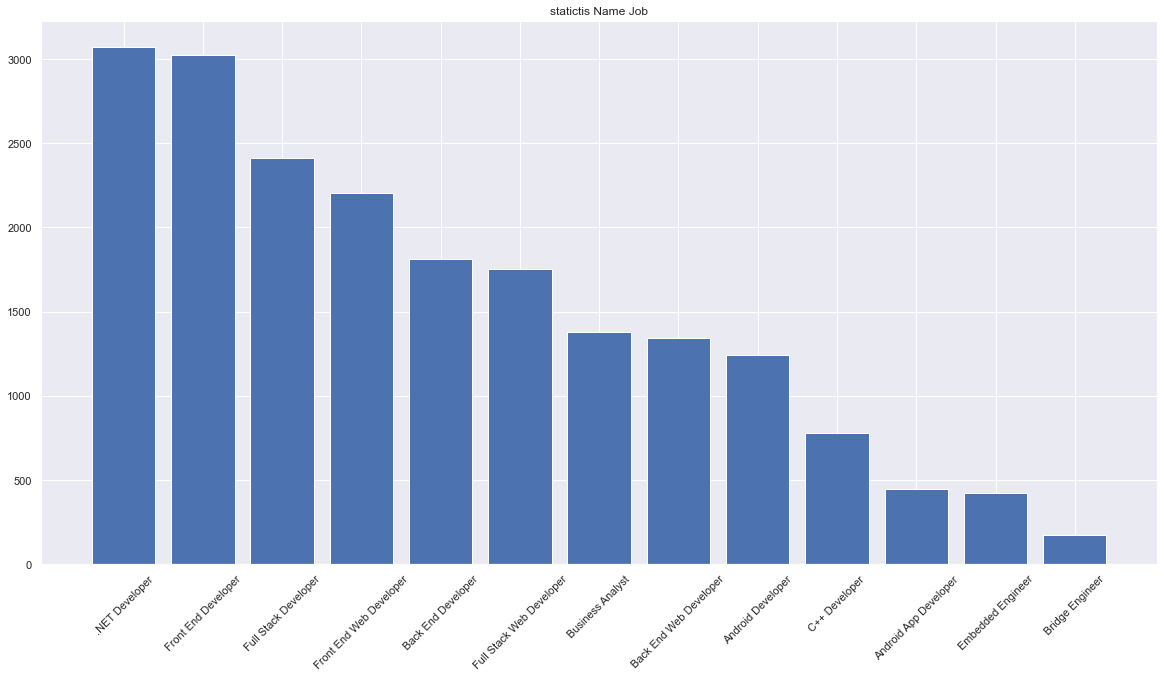

In [83]:
fig = plt.figure(figsize =(20,10))
plt.title('statictis Name Job')
plt.bar(df['JobUrl'].value_counts().keys(),df['JobUrl'].value_counts().values)
plt.xticks(rotation = 45)
plt.show()

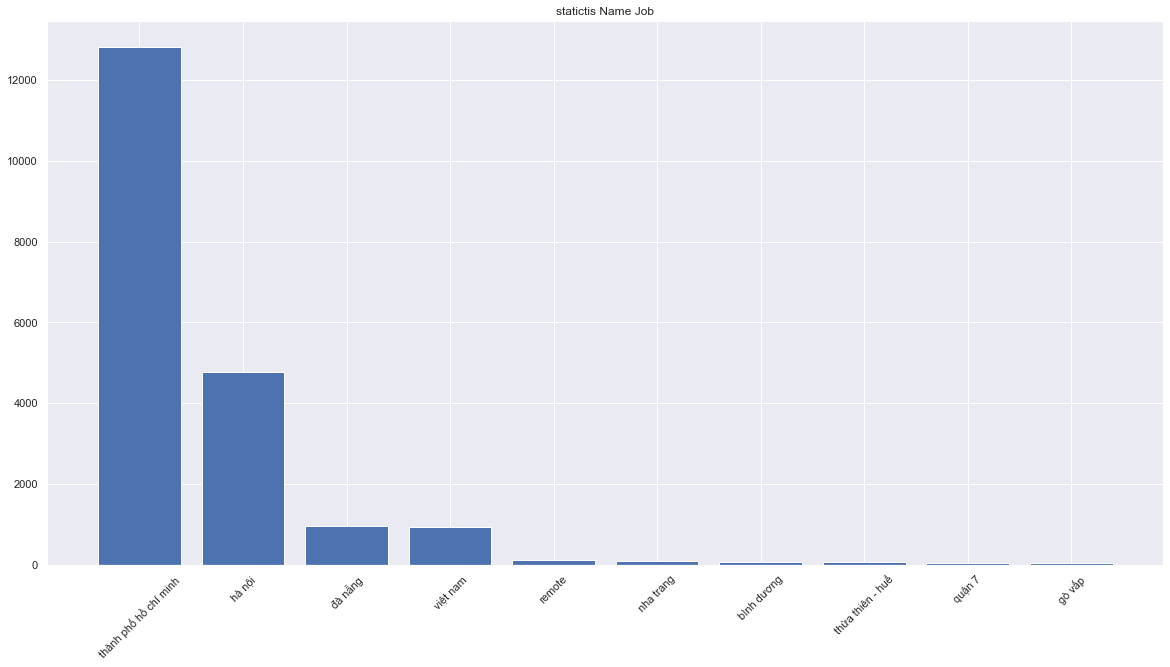

In [84]:
fig = plt.figure(figsize =(20,10))
plt.title('statictis Name Job')
plt.bar(df['Location'].value_counts().keys()[:10],df['Location'].value_counts().values[:10])
plt.xticks(rotation = 45)
plt.show()

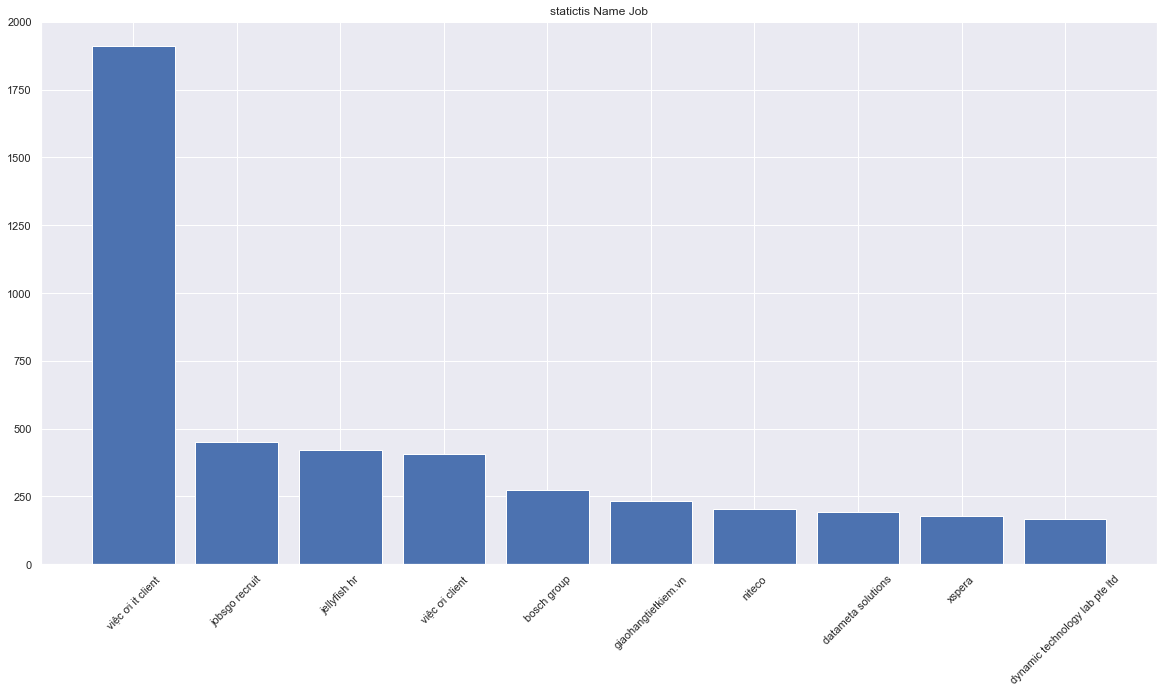

In [85]:
fig = plt.figure(figsize =(20,10))
plt.title('statictis Name Job')
plt.bar(df['Company'].value_counts().keys()[:10],df['Company'].value_counts().values[:10])
plt.xticks(rotation = 45)
plt.show()

In [86]:
df.columns

Index(['index', 'JobTitle', 'Company', 'Location', 'PostDate', 'ExtractDate',
       'JobUrl', 'YearExperience', 'skill', 'level', 'skill_cut', 'level_cut'],
      dtype='object')

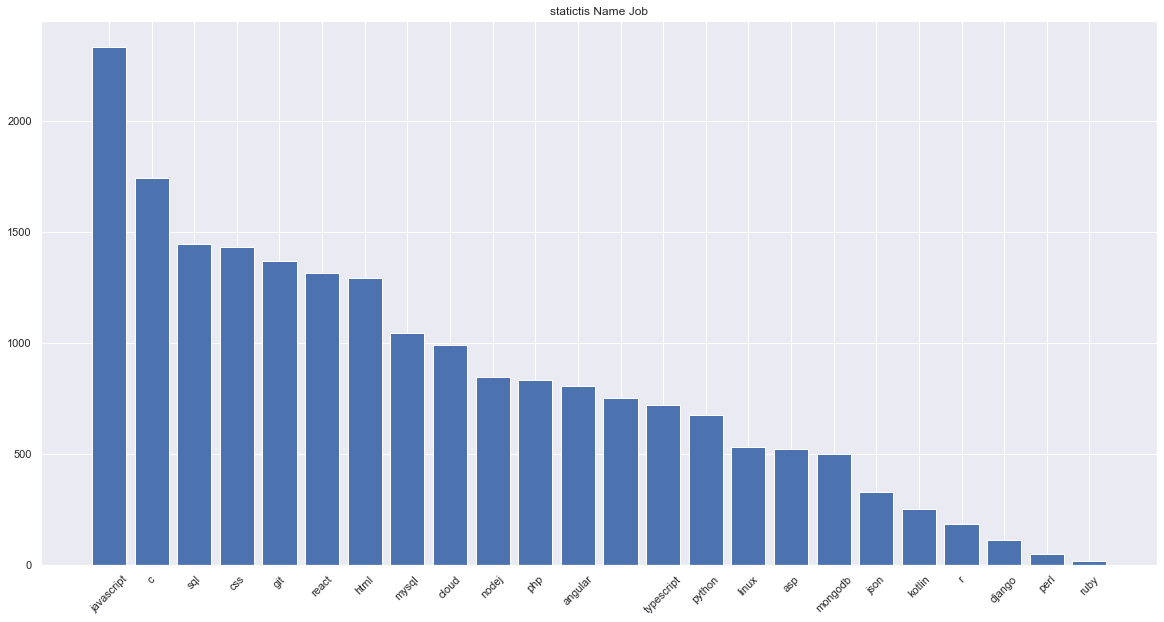

In [87]:
fig = plt.figure(figsize =(20,10))
plt.title('statictis Name Job')
plt.bar(df['skill_cut'].value_counts().keys(),df['skill_cut'].value_counts().values)
plt.xticks(rotation = 45)
plt.show()

In [88]:
df['skill_cut'].unique()

array(['c', 'javascript', 'sql', 'typescript', 'nodej', 'asp', 'linux',
       'r', 'html', 'react', 'python', 'angular', 'css', 'cloud', 'git',
       'json', 'php', 'mysql', '', 'mongodb', 'django', 'kotlin', 'perl',
       'ruby'], dtype=object)

In [89]:
df.loc[df['skill_cut'] == '', :]

,index,JobTitle,Company,Location,PostDate,ExtractDate,JobUrl,YearExperience,skill,level,skill_cut,level_cut
199,38,net developer,bstar solutions,thành phố hồ chí minh,Posted\nPosted 30+ days ago,2023-01-25,.NET Developer,0,,fresher,,fresher
364,71,hr dụng tiếng anh tốt_ net,viec oi,đà nẵng,Posted\nPosted 30+ days ago,2023-01-25,.NET Developer,5,,senior,,senior
432,79,vie renewable energy consultant vietnam h f,syneria,thành phố hồ chí minh,Posted\nPosted 5 days ago,2023-01-25,.NET Developer,2,,intern,,intern
635,116,net engineers,sea-solutions,hà nội,Posted\nPosted 30+ days ago,2023-01-25,.NET Developer,0,,"intern, senior",,intern
636,116,net engineers,sea-solutions,hà nội,Posted\nPosted 30+ days ago,2023-01-25,.NET Developer,0,,"intern, senior",,senior
...,...,...,...,...,...,...,...,...,...,...,...,...
19484,4307,developer,jellyfish hr,thành phố hồ chí minh,Posted\nPosted 30+ days ago,2023-01-26,Full Stack Web Developer,2,,"junior, full stack",,junior
19485,4307,developer,jellyfish hr,thành phố hồ chí minh,Posted\nPosted 30+ days ago,2023-01-26,Full Stack Web Developer,2,,"junior, full stack",,full stack
19873,4359,documentary project manager người nhật hoặc ng...,việc ơi it client,thành phố hồ chí minh,Posted\nPosted 30+ days ago,2023-01-26,Full Stack Web Developer,2,,"intern, senior, full stack",,intern
19874,4359,documentary project manager người nhật hoặc ng...,việc ơi it client,thành phố hồ chí minh,Posted\nPosted 30+ days ago,2023-01-26,Full Stack Web Developer,2,,"intern, senior, full stack",,senior


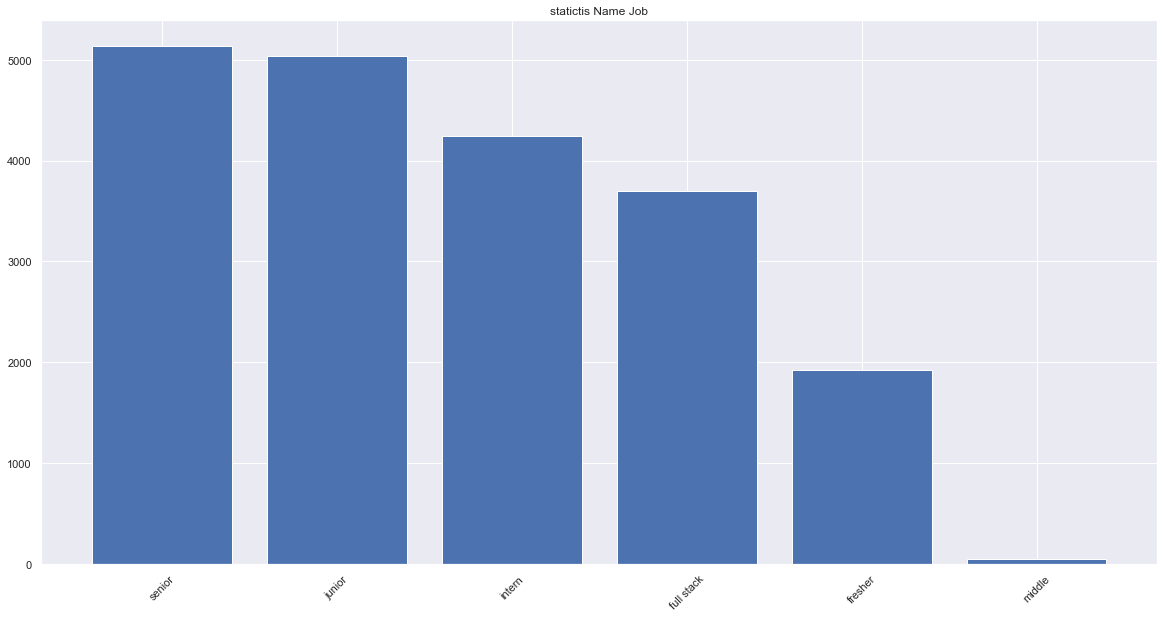

In [519]:
fig = plt.figure(figsize =(20,10))
plt.title('statictis Name Job')
plt.bar(df['level_cut'].value_counts().keys(),df['level_cut'].value_counts().values)
plt.xticks(rotation = 45)
plt.show()